In [41]:
# Import numpy library for numerical operations.
import numpy as np 
# Import pandas library to control data handling.
import pandas as pd 
# Import matplotlib to plot graphs.
import matplotlib.pyplot as plt 
# Import rcParams from matplotlib to customise plots.
from matplotlib import rcParams 
# Import scikit-learn, a ML library.
import sklearn 
# Import KMeans to cluster from scikit-learn.
from sklearn.cluster import KMeans 
# Import 3D plotting tools from matplotlib.
from mpl_toolkits.mplot3d import Axes3D 
# Import a function for scaling data.
from sklearn.preprocessing import scale 
# Import metrics to evaluate models.
import sklearn.metrics as am 
# Import datasets from scikit-learn.
from sklearn import datasets 
# Import tools to create a confusion matrix and classification report.
from sklearn.metrics import confusion_matrix, classification_report 
# Import seaborn for more advanced data/visualization.
import seaborn as sns 

In [42]:
# Graph setup 
%matplotlib inline 
# Set default size for the plots.
rcParams['figure.figsize'] = 7,4 

In [43]:
# We will use the scikit built-in dataset 'Iris' - https://en.wikipedia.org/wiki/Iris_flower_data_set 
# Load Iris dataset.
iris = datasets.load_iris() 

# Scale feature data to normalise.
X = scale(iris.data) 

# Convert target data to the pandas DataFrame.
y = pd.DataFrame(iris.target) 

# Store names of all the features.
variable_names = iris.feature_names 

# create a display of the first 10 rows of scaled data.
X[0:10,]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [44]:
#Build and run the model 
# to suppress memory leak warning: 
import os 
os.environ['OMP_NUM_THREADS'] = '1' 


In [45]:
# Cluster the data 
clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids and randomizes centroid positions 
# Fit KMeans model to scaled data.
clustering.fit(X) 

KMeans(n_clusters=3, n_init=10, random_state=5)

In [46]:
# Create DataFrame from Iris dataset's feature data.
iris_df = pd.DataFrame(iris.data) 
# Rename columns to match with feature names.
iris_df.columns = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"] 

# Rename target column to: "Targets".
y.columns = ["Targets"]

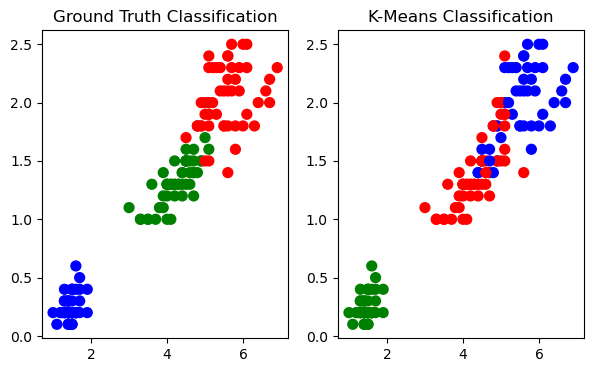

In [47]:
#done above- I added this because for some reason I had a error and adding this fixed this
import matplotlib.pyplot as plt
import numpy as np

# Adjust clustering labels so they match to the original classes.
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64) 

# Define color scheme for graph plots.
color_theme = np.array(['blue', 'green', 'red'])

# Plot true class labels based by: Petal_Length and Petal_Width.
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

# Plot K-Means Cluster results based from the Petal_Length and Petal_Width.
plt.subplot(1, 2, 2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

# Display graph plots.
plt.show()


In [48]:
# Print tje report comparing true labels to the already predicted labels.
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

